In [1]:
import logging
import numpy as np
import perceval as pcvl
from perceval.algorithm import Sampler
from perceval.components import PS, BS
import sys

from utils import svd_decomposition, print_circuit_structure
from clements import decompose_clements

logging.basicConfig(
    stream=sys.stdout,      # Direct logs to stdout
    level=logging.DEBUG
)

### Input Matrix

In [2]:
A = (1 / np.sqrt(2)) * np.ones((2,2)).astype(np.complex128)

### Running Clement's Decomposition

In [3]:
U_c = decompose_clements(A)
[phis, thetas, alphas] = decompose_clements(A)

In [4]:
print_circuit_structure(phis, thetas, alphas)
print(U_c)

--- CIRCUIT CONSTRUCTION (N=2) ---

Layer 0:
  [MZI] connecting WG-0 & WG-1 | phi=3.142, theta=0.785

Output Phase Screen:
  WG-0: Phase Shifter = -2.116
  WG-1: Phase Shifter = 1.571
(array([[3.14159265]]), array([[0.78539816]]), array([-2.11635243,  1.57079633]))


### Simulation with Perceval

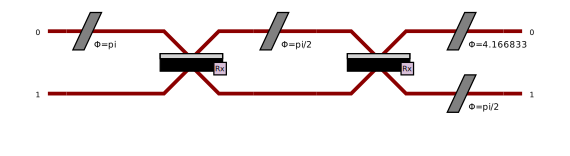

In [5]:
circuit = pcvl.Circuit(2)


circuit.add(0, PS(phi=U_c[0][0]))
circuit.add(0, BS())
circuit.add(0,PS(phi=U_c[1][0] * 2))
circuit.add(0, BS())

circuit.add(0, PS(phi=U_c[2][0]))
circuit.add(1, PS(phi=U_c[2][1]))

pcvl.pdisplay(circuit)

In [6]:
circuit.compute_unitary()

MatrixN([[-0.68686621-0.16797266j,  0.68686621+0.16797266j],
         [ 0.5       +0.5j       ,  0.5       +0.5j       ]])

In [7]:
p = pcvl.Processor("SLOS", circuit)
p.min_detected_photons_filter(1)
p.compute_physical_logical_perf(True)

p.with_input(pcvl.BasicState([1,0]))
sampler = Sampler(p)
probs = sampler.probs()
print(probs['results'])

{
	|0,1>: 0.5
	|1,0>: 0.5
}
